In [2]:
# Importa o Sympy
import sympy as sp

# Importa o Numpy
import numpy as np

# Importa o Matplot lib
import matplotlib.pyplot as plt

# Importa o módulo Toolbox
import Toolbox as T




In [8]:
# Equação Diferencial
# Int(d²V/dx²*EI*d²w/dx²*dx) = Int(w*q*dx)+w*V|L-0 + dw/dx*M|L-0


# Define variável
x = sp.symbols('x')
L = sp.symbols('L')
x0 = 0
x1 = L
EI = sp.symbols('EI')
q0 =sp.symbols('q0') 
q = q0*x/L

a0, a1, a2, a3,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base   = (a0,a1,a2,a3,a4)
base_b = (b0,b1,b2,b3,b4)

# Base
f_base = a0+a1*x+a2*x**2+a3*x**3+a4*x**4

sp.pprint(sp.latex(f_base))

w_base = b0+b1*x+b2*x**2+b3*x**3+b4*x**4

#Compatibiliza Equações

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,(a0,a1,a2,a3,a4),[('valor',0,0),('valor',L,0)])

sp.pprint(sp.latex(f_compat))


w_compat,t = T.compatibiliza_cc_com_derivada(w_base,x,(b0,b1,b2,b3,b4),[('valor',0,0),('valor',L,0)])


V = -sp.diff(sp.diff(f_compat,x,2)*EI,x)
M = EI*sp.diff(f_compat,x,2)

# EDO # Int(d²v/dx²*EI*d²w/dx²*dx) = Int(w*q*dx)+(w*V|L-0 + (dw/dx*M|L-0

#Lado Esquerdo

LE = (sp.integrate(sp.diff(f_compat,x,2)*EI*sp.diff(w_compat,x,2),(x,x0,x1)))

# sp.pprint(LE)

#Lado Direito

LD_1 = w_compat*V
LD_2 = sp.diff(w_compat,x)*M

LD = (sp.integrate(w_compat*q,(x,x0,x1))+(LD_1.subs(x,x1)-LD_1.subs(x,x0))+(LD_2.subs(x,x1)-LD_2.subs(x,x0)))

# sp.pprint(LD)

eqs = [sp.collect(LD-LE.expand(),b,evaluate=False).get(b,0) for b in base_b]

# sp.pprint(eqs)

sol = sp.solve(eqs,base)

sp.pprint(sol)

f_residuos_pond = f_compat.subs(sol).simplify()

sp.pprint(f_residuos_pond)

sp.pprint(sp.latex(f_residuos_pond))

a_{0} + a_{1} x + a_{2} x^{2} + a_{3} x^{3} + a_{4} x^{4}
x \left(- L \left(L^{2} a_{4} + L a_{3} + a_{2}\right) + a_{2} x + a_{3} x^{2} ↪

↪  + a_{4} x^{3}\right)
⎧        2                          ⎫
⎪    41⋅L ⋅q₀      -L⋅q₀        q₀  ⎪
⎨a₂: ────────, a₃: ──────, a₄: ─────⎬
⎪     240⋅EI       10⋅EI       48⋅EI⎪
⎩                                   ⎭
     ⎛      3       2           2      3⎞
q₀⋅x⋅⎝- 22⋅L  + 41⋅L ⋅x - 24⋅L⋅x  + 5⋅x ⎠
─────────────────────────────────────────
                 240⋅EI                  
\frac{q_{0} x \left(- 22 L^{3} + 41 L^{2} x - 24 L x^{2} + 5 x^{3}\right)}{240 ↪

↪  EI}


In [ ]:
# Equação Diferencial
# Int(d²V/dx²*EI*d²w/dx²*dx) = Int(w*q*dx)+w*V|L-0 + dw/dx*M|L-0


# Define variável
x = sp.symbols('x')
L = sp.symbols('L')
x0 = 0
x1 = L
EI = sp.symbols('EI')
q = sp.symbols('q0')*x/L

a0, a1, a2, a3,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base   = (a0,a1,a2,a3,a4)
base_b = (b0,b1,b2,b3,b4)

# Base
f_base = a0*sp.sin(sp.pi*x/L)+a1*sp.cos(sp.pi*x/L)

sp.pprint(sp.latex(f_base))

w_base = b0*sp.sin(sp.pi*x/L)+b1*sp.cos(sp.pi*x/L)

#Compatibiliza Equações

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,(a0,a1,a2,a3,a4),[('valor',0,0),('valor',L,0)])

sp.pprint(sp.latex(f_compat))


w_compat,t = T.compatibiliza_cc_com_derivada(w_base,x,(b0,b1,b2,b3,b4),[('valor',0,0),('valor',L,0)])


V = -sp.diff(sp.diff(f_compat,x,2)*EI,x)
M = EI*sp.diff(f_compat,x,2)

# EDO # Int(d²v/dx²*EI*d²w/dx²*dx) = Int(w*q*dx)+(w*V|L-0 + (dw/dx*M|L-0

#Lado Esquerdo

LE = sp.integrate(sp.diff(f_compat,x,2)*EI*sp.diff(w_compat,x,2),(x,x0,x1))

# sp.pprint(LE)

#Lado Direito

LD_1 = w_compat*V
LD_2 = sp.diff(w_compat,x)*M

LD = sp.integrate(w_compat*q*x,(x,x0,x1))+(LD_1.subs(x,x1)-LD_1.subs(x,x0))+(LD_2.subs(x,x1)-LD_2.subs(x,x0))

# sp.pprint(LD)

eqs = [sp.collect(LD-LE,b,evaluate=False).get(b,0) for b in base_b]

# sp.pprint(eqs)

sol = sp.solve(eqs,base)

sp.pprint(sol)

f_residuos_pond1 = f_compat.subs(sol).simplify()

sp.pprint(f_residuos_pond1)

sp.pprint(sp.latex(f_residuos_pond1))

a_{0} \sin{\left(\frac{\pi x}{L} \right)} + a_{1} \cos{\left(\frac{\pi x}{L} \ ↪

↪ right)}
a_{0} \sin{\left(\frac{\pi x}{L} \right)}
[]
      ⎛π⋅x⎞
a₀⋅sin⎜───⎟
      ⎝ L ⎠
a_{0} \sin{\left(\frac{\pi x}{L} \right)}


In [4]:
# Equação Diferencial
# Int(d²V/dx²*EI*d²w/dx²*dx) = Int(w*q*dx)+w*V|L-0 + dw/dx*M|L-0


# Define variável
x = sp.symbols('x')
L = sp.symbols('L')
x0 = 0
x1 = L
EI = sp.symbols('EI')
q = sp.symbols('q')

a0, a1, a2, a3,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base   = (a0,a1,a2,a3,a4)
base_b = (b0,b1,b2,b3,b4)

# Base
f_base = a1*sp.sin(sp.pi*x/L)+a2*sp.sin(2*sp.pi*x/L)+a3*sp.sin(3*sp.pi*x/L)+a4*sp.cos(sp.pi*x/L)

sp.pprint(sp.latex(f_base))

w_base = b1*sp.sin(sp.pi*x/L)+b2*sp.sin(2*sp.pi*x/L)+b3*sp.sin(3*sp.pi*x/L)+b4*sp.cos(sp.pi*x/L)

#Compatibiliza Equações

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,(a0,a1,a2,a3,a4),[('valor',0,0),('valor',L,0)])

sp.pprint(sp.latex(f_compat))


w_compat,t = T.compatibiliza_cc_com_derivada(w_base,x,(b0,b1,b2,b3,b4),[('valor',0,0),('valor',L,0)])


V = -sp.diff(sp.diff(f_compat,x,2)*EI,x)
M = EI*sp.diff(f_compat,x,2)

# EDO # Int(d²v/dx²*EI*d²w/dx²*dx) = Int(w*q*dx)+(w*V|L-0 + (dw/dx*M|L-0

#Lado Esquerdo

LE = (sp.integrate(sp.diff(f_compat,x,2)*EI*sp.diff(w_compat,x,2),(x,x0,x1))).expand()

# sp.pprint(LE)

#Lado Direito

LD_1 = w_compat*V
LD_2 = sp.diff(w_compat,x)*M

LD = (sp.integrate(w_compat*q*x,(x,x0,x1))+(LD_1.subs(x,x1)-LD_1.subs(x,x0))+(LD_2.subs(x,x1)-LD_2.subs(x,x0))).expand()

# sp.pprint(LD)

eqs = [sp.collect((LD-LE).expand(),b,evaluate=False).get(b,0) for b in base_b]

sp.pprint(eqs)

sol = sp.solve(eqs,base)

sp.pprint(sol)

f_residuos_pond2 = f_compat.subs(sol).simplify()

sp.pprint(f_residuos_pond2)

sp.pprint(sp.latex(f_residuos_pond2))

a_{1} \sin{\left(\frac{\pi x}{L} \right)} + a_{2} \sin{\left(\frac{2 \pi x}{L} ↪

↪  \right)} + a_{3} \sin{\left(\frac{3 \pi x}{L} \right)} + a_{4} \cos{\left(\ ↪

↪ frac{\pi x}{L} \right)}
a_{1} \sin{\left(\frac{\pi x}{L} \right)} + a_{2} \sin{\left(\frac{2 \pi x}{L} ↪

↪  \right)} + a_{3} \sin{\left(\frac{3 \pi x}{L} \right)}
⎡      4          2         4          2          4          2     ⎤
⎢     π ⋅EI⋅a₁   L ⋅q    8⋅π ⋅EI⋅a₂   L ⋅q    81⋅π ⋅EI⋅a₃   L ⋅q   ⎥
⎢0, - ──────── + ────, - ────────── - ────, - ─────────── + ────, 0⎥
⎢          3      π           3       2⋅π           3       3⋅π    ⎥
⎣       2⋅L                  L                   2⋅L               ⎦
⎧       5           5              5    ⎫
⎪    2⋅L ⋅q       -L ⋅q         2⋅L ⋅q  ⎪
⎨a₁: ──────, a₂: ────────, a₃: ─────────⎬
⎪     5              5              5   ⎪
⎩    π ⋅EI       16⋅π ⋅EI      243⋅π ⋅EI⎭
 5   ⎛        ⎛π⋅x⎞          ⎛2⋅π⋅x⎞         ⎛3⋅π⋅x⎞⎞
L ⋅q⋅⎜7776⋅sin⎜───⎟ - 243⋅sin⎜─────⎟ + 32⋅sin⎜─────⎟⎟
     ⎝ 

In [5]:
# Equação Diferencial
# Int(d²V/dx²*EI*d²w/dx²*dx) = Int(w*q*dx)+w*V|L-0 + dw/dx*M|L-0


# Define variável
x = sp.symbols('x')
L = sp.symbols('L')
x0 = 0
x1 = L
EI = sp.symbols('EI')
q = sp.symbols('q')*x

a0, a1, a2, a3,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base   = (a0,a1,a2,a3,a4)
base_b = (b0,b1,b2,b3,b4)

# Base
f_base = a1*sp.sin(x/L)+a2*sp.sin(2*x/L)+a3*sp.sin(3*x/L)+a4*sp.sin(4*x/L)+a0*sp.cos(sp.pi*x/L)

sp.pprint(sp.latex(f_base))

w_base = b1*sp.sin(x/L)+b2*sp.sin(2*x/L)+b3*sp.sin(3*x/L)+b4*sp.sin(4*x/L)+b0*sp.cos(sp.pi*x/L)

#Compatibiliza Equações

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,(a0,a1,a2,a3,a4),[('valor',0,0),('valor',L,0)])

sp.pprint(sp.latex(f_compat))


w_compat,t = T.compatibiliza_cc_com_derivada(w_base,x,(b0,b1,b2,b3,b4),[('valor',0,0),('valor',L,0)])


V = -sp.diff(sp.diff(f_compat,x,2)*EI,x)
M = EI*sp.diff(f_compat,x,2)

# EDO # Int(d²v/dx²*EI*d²w/dx²*dx) = Int(w*q*dx)+(w*V|L-0 + (dw/dx*M|L-0

#Lado Esquerdo

LE = sp.integrate(sp.diff(f_compat,x,2)*EI*sp.diff(w_compat,x,2),(x,x0,x1))

# sp.pprint(LE)

#Lado Direito

LD_1 = w_compat*V
LD_2 = sp.diff(w_compat,x)*M

LD = sp.integrate(w_compat*q,(x,x0,x1))+(LD_1.subs(x,x1)-LD_1.subs(x,x0))+(LD_2.subs(x,x1)-LD_2.subs(x,x0))

# sp.pprint(LD)

eqs = [sp.collect((LD-LE).expand(),b,evaluate=False).get(b,0) for b in base_b]

# sp.pprint(eqs)

sol = sp.solve(eqs,base)

sp.pprint(sol)

f_residuos_pond3 = f_compat.subs(sol).simplify()

sp.pprint(f_residuos_pond3)

sp.pprint(sp.latex(f_residuos_pond3))

a_{0} \cos{\left(\frac{\pi x}{L} \right)} + a_{1} \sin{\left(\frac{x}{L} \righ ↪

↪ t)} + a_{2} \sin{\left(\frac{2 x}{L} \right)} + a_{3} \sin{\left(\frac{3 x}{ ↪

↪ L} \right)} + a_{4} \sin{\left(\frac{4 x}{L} \right)}
\frac{- \left(a_{2} \sin{\left(2 \right)} + a_{3} \sin{\left(3 \right)} + a_{4 ↪

↪ } \sin{\left(4 \right)}\right) \sin{\left(\frac{x}{L} \right)} + \left(a_{2} ↪

↪  \sin{\left(\frac{2 x}{L} \right)} + a_{3} \sin{\left(\frac{3 x}{L} \right)} ↪

↪  + a_{4} \sin{\left(\frac{4 x}{L} \right)}\right) \sin{\left(1 \right)}}{\si ↪

↪ n{\left(1 \right)}}


KeyboardInterrupt: 

 ⎛         2⎞                          
-⎝-16 + 3⋅π ⎠⋅(-cos(π⋅x) - 1)⋅sin(π⋅x) 
───────────────────────────────────────
                   7                   
                  π                    


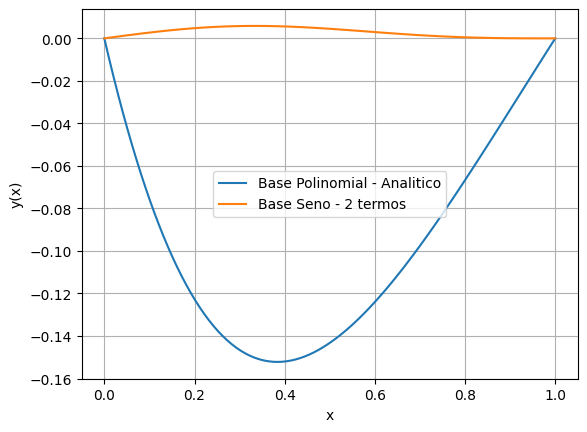

In [9]:
substi = {EI:1,L:1,q0:10}
# sp.pprint(substi)

f_residuos_pond_plot = f_residuos_pond.subs(substi)
# sp.pprint(f_residuos_pond_plot)

f_residuos_pond_plot1 = f_residuos_pond1.subs(substi)
sp.pprint(f_residuos_pond_plot1)

# f_residuos_pond_plot2 = f_residuos_pond2.subs(substi)
# sp.pprint(f_residuos_pond_plot2)

# f_residuos_pond_plot3 = f_residuos_pond3.subs(substi)
# sp.pprint(f_residuos_pond_plot3)

T.prepara_plot(f_residuos_pond_plot,x,x0,1,"Base Polinomial - Analitico")
T.prepara_plot(f_residuos_pond_plot1,x,x0,1,"Base Seno - 2 termos")
# T.prepara_plot(f_residuos_pond_plot2,x,x0,1,"Base Seno - 3 termos")
# T.prepara_plot(f_residuos_pond_plot3,x,x0,1,"Base Seno - 4 termos")


plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.legend()
plt.show()